In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Purpose of the Dataset
The primary aim is to investigate the gene expression profiles of MCF7 cells when exposed to benzoapyrene and ionizing radiation compared to untreated cells. This kind of analysis can help identify which genes are upregulated or downregulated in response to these treatments, providing insights into the molecular mechanisms of stress response, DNA damage repair, and possibly carcinogenesis.

In [57]:
# Load the dataset into a DataFrame
geo_data = pd.read_csv("E:\Data Analytics Project\gene clustering\mcf7_ge.csv")
geo_data.head()

,Geneid,Chr,Start,End,strand,Length,Counts
0,ENSG00000223972,1;1;1;1;1;1;1;1;1,11869;12010;12179;12613;12613;12975;13221;1322...,12227;12057;12227;12721;12697;13052;13374;1440...,+;+;+;+;+;+;+;+;+,1735,0
1,ENSG00000227232,1;1;1;1;1;1;1;1;1;1;1,14404;15005;15796;16607;16858;17233;17606;1791...,14501;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1351,5
2,ENSG00000278267,1,17369,17436,-,68,6
3,ENSG00000243485,1;1;1;1;1,29554;30267;30564;30976;30976,30039;30667;30667;31109;31097,+;+;+;+;+,1021,0
4,ENSG00000284332,1,30366,30503,+,138,0


## Data Description
Geneid: The unique identifier for each gene, in this case, using the Ensembl Gene ID format (e.g., ENSG00000223972).

Chr: The chromosome(s) where the gene is located. Multiple chromosomes are separated by semicolons.

Start: The start positions of the gene on the chromosome(s). If a gene has multiple start positions, they are separated by semicolons.

End: The end positions of the gene on the chromosome(s). Like the start positions, multiple end positions are separated by semicolons.

Strand: The DNA strand (either '+' for the forward strand or '-' for the reverse strand) on which the gene is located. Multiple strands for a gene are separated by semicolons.

Length: The length of the gene in base pairs.

Expression: This column contains the expression levels of the genes under specific experimental conditions. The values are numeric and represent the read counts from RNA sequencing.

## Overall Design
MCF7 cells were exposed to 1 µM benzoapyrene, 5 Gy ionizing radiation, or nothing for 120 hours.
RNA-seq was used to perform comparative gene expression profiling analysis from 3 independent experiments.

## Data Preprocessing

In [58]:
# Keep only necessary columns
expression_data = geo_data[['Geneid', 'Counts']]

# Rename columns for easier access
expression_data.columns = ['Geneid', 'Expression']

# Display the processed DataFrame
print(expression_data)

                Geneid  Expression
0      ENSG00000223972           0
1      ENSG00000227232           5
2      ENSG00000278267           6
3      ENSG00000243485           0
4      ENSG00000284332           0
...                ...         ...
58730  ENSG00000271254         369
58731  ENSG00000275405           0
58732  ENSG00000275987           0
58733  ENSG00000277475           0
58734  ENSG00000268674           0

[58735 rows x 2 columns]


## Data Normalization

In [59]:
# Normalize the expression data
scaler = StandardScaler()
expression_data['Normalized_Expression'] = scaler.fit_transform(expression_data[['Expression']])

# Display the normalized data
print(expression_data)

                Geneid  Expression  Normalized_Expression
0      ENSG00000223972           0              -0.119180
1      ENSG00000227232           5              -0.118025
2      ENSG00000278267           6              -0.117794
3      ENSG00000243485           0              -0.119180
4      ENSG00000284332           0              -0.119180
...                ...         ...                    ...
58730  ENSG00000271254         369              -0.033896
58731  ENSG00000275405           0              -0.119180
58732  ENSG00000275987           0              -0.119180
58733  ENSG00000277475           0              -0.119180
58734  ENSG00000268674           0              -0.119180

[58735 rows x 3 columns]


C:\Users\Mister ABD\AppData\Local\Temp\ipykernel_4964\227723101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data['Normalized_Expression'] = scaler.fit_transform(expression_data[['Expression']])


## Clustering of Genes

In [60]:
# Reshape to a 2D array (single feature)
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 6):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(expression_data[['Normalized_Expression']])
    inertia.append(kmeans.inertia_)

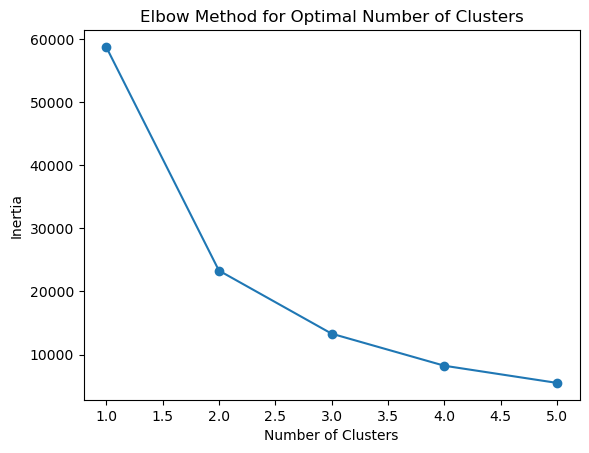

In [61]:
# Plot the elbow method results

plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


## Clustering by K-Means

In [62]:
# Fit K-means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)
expression_data['Cluster'] = kmeans.fit_predict(expression_data[['Normalized_Expression']])

C:\Users\Mister ABD\AppData\Local\Temp\ipykernel_4964\1769872095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data['Cluster'] = kmeans.fit_predict(expression_data[['Normalized_Expression']])


In [63]:
# Display the clustered data
print(expression_data)

                Geneid  Expression  Normalized_Expression  Cluster
0      ENSG00000223972           0              -0.119180        0
1      ENSG00000227232           5              -0.118025        0
2      ENSG00000278267           6              -0.117794        0
3      ENSG00000243485           0              -0.119180        0
4      ENSG00000284332           0              -0.119180        0
...                ...         ...                    ...      ...
58730  ENSG00000271254         369              -0.033896        0
58731  ENSG00000275405           0              -0.119180        0
58732  ENSG00000275987           0              -0.119180        0
58733  ENSG00000277475           0              -0.119180        0
58734  ENSG00000268674           0              -0.119180        0

[58735 rows x 4 columns]


### Visualize the clusters

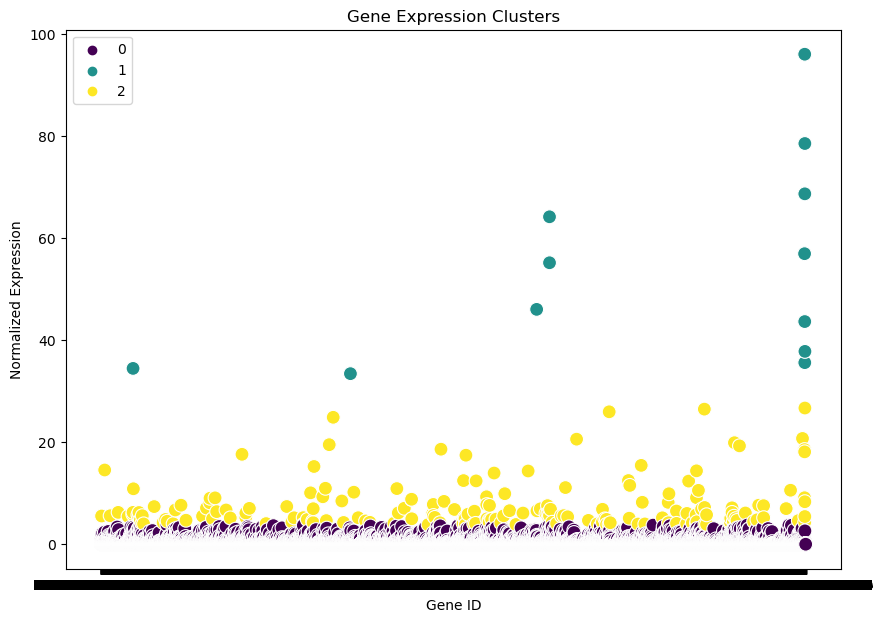

In [64]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=expression_data, x='Geneid', y='Normalized_Expression', hue='Cluster', palette='viridis', s=100)
plt.title('Gene Expression Clusters')
plt.xlabel('Gene ID')
plt.ylabel('Normalized Expression')
plt.legend()
plt.show()

## Evaluation of clusters of Clusters

In [65]:
# Evaluate clustering performance
silhouette_avg = silhouette_score(expression_data[['Normalized_Expression']], expression_data['Cluster'])
db_index = davies_bouldin_score(expression_data[['Normalized_Expression']], expression_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Silhouette Score: 0.9754
Davies-Bouldin Index: 0.4393


In [66]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(expression_data[['Normalized_Expression']])


C:\Users\Mister ABD\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [67]:
expression_data['t-SNE Component 1'] = tsne_result[:, 0]
expression_data['t-SNE Component 2'] = tsne_result[:, 1]

C:\Users\Mister ABD\AppData\Local\Temp\ipykernel_4964\2462342535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data['t-SNE Component 1'] = tsne_result[:, 0]
C:\Users\Mister ABD\AppData\Local\Temp\ipykernel_4964\2462342535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data['t-SNE Component 2'] = tsne_result[:, 1]


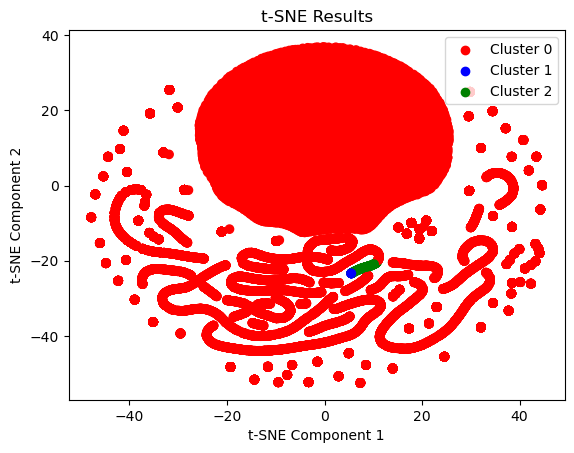

In [68]:
# Create a color map for clusters (customize as needed)
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}

# Plot the t-SNE results with assigned colors based on the 'Cluster' column
plt.scatter(expression_data['t-SNE Component 1'], expression_data['t-SNE Component 2'],
            c=[cluster_colors[label] for label in expression_data['Cluster']],
            marker='o')

# Create a legend for clusters
for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')  # Empty scatter plot for legend

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Results')
plt.legend()
plt.show()

In [69]:
expression_data

,Geneid,Expression,Normalized_Expression,Cluster,t-SNE Component 1,t-SNE Component 2
0,ENSG00000223972,0,-0.119180,0,-0.347097,11.076152
1,ENSG00000227232,5,-0.118025,0,-9.886523,-14.743019
2,ENSG00000278267,6,-0.117794,0,29.690861,-1.410301
3,ENSG00000243485,0,-0.119180,0,-0.347098,11.076116
4,ENSG00000284332,0,-0.119180,0,-0.347097,11.076288
...,...,...,...,...,...,...
58730,ENSG00000271254,369,-0.033896,0,37.746529,2.138774
58731,ENSG00000275405,0,-0.119180,0,14.051193,22.212774
58732,ENSG00000275987,0,-0.119180,0,-7.570322,23.474432
58733,ENSG00000277475,0,-0.119180,0,0.779822,15.407249
